**Importing Dependencies**

In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as implt
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split

In [3]:
files_with_mask = os.listdir('data/with_mask')
files_with_mask[0:5]

['with_mask_2140.jpg',
 'with_mask_1449.jpg',
 'with_mask_2626.jpg',
 'with_mask_942.jpg',
 'with_mask_3538.jpg']

In [4]:
files_without_mask = os.listdir('data/without_mask')
files_without_mask[0:5]

['without_mask_3593.jpg',
 'without_mask_2855.jpg',
 'without_mask_1384.jpg',
 'without_mask_1390.jpg',
 'without_mask_2699.jpg']

In [6]:
print("No. of images with mask = ",len(files_with_mask))
print("No. of images without mask = ",len(files_without_mask))

No. of images with mask =  3725
No. of images without mask =  3828


**Encoding Classes**

with mask : 1

without mask : 0

In [7]:
with_mask_labels = [1]*len(files_with_mask)
without_mask_labels = [0]*len(files_without_mask)

In [8]:
labels = with_mask_labels + without_mask_labels
len(labels)

7553

**Displaying Images**

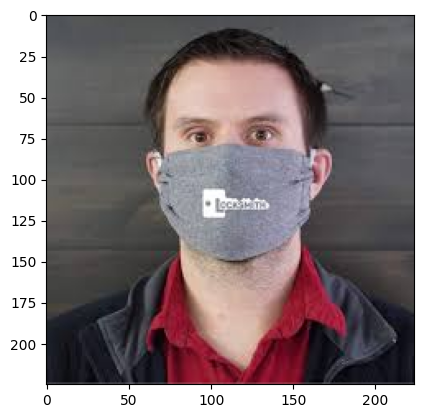

In [9]:
img1 = implt.imread('data/with_mask/with_mask_2626.jpg')
plt.imshow(img1)

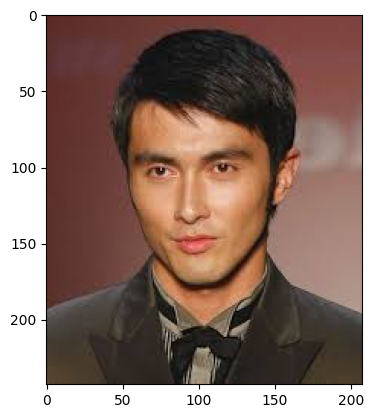

In [11]:
img2 = implt.imread('data/without_mask/without_mask_2626.jpg')
plt.imshow(img2)

**Image Pre-processing**

1. Resize
2. Converting to numpy arrays

In [12]:
with_mask_path = 'data/with_mask/'

data = []

for img_file in files_with_mask:
    image = Image.open(with_mask_path + img_file)
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)
    

without_mask_path = 'data/without_mask/'

for img_file in files_without_mask:
    image = Image.open(without_mask_path + img_file)
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

/Users/jaybhatt/ML/MlEnv/lib/python3.11/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [13]:
len(data)

7553

In [14]:
#Converting Image data and Labels as numoy arrays
X = np.array(data)
Y = np.array(labels)

In [15]:
X.shape

(7553, 128, 128, 3)

In [16]:
Y.shape

(7553,)

**Train Test Split**

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [22]:
X_train_scaled, X_test_scaled = X_train/255.0, X_test/255.0

**Building a CNN**

In [23]:
import tensorflow as tf
from tensorflow import keras

In [28]:
num_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu',))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5)) 

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_classes, activation='sigmoid'))

In [29]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

Training

In [31]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 19s 108ms/step - loss: 0.4856 - acc: 0.7887 - val_loss: 0.3233 - val_acc: 0.8645
Epoch 2/5
170/170 [==============================] - 19s 109ms/step - loss: 0.2860 - acc: 0.8845 - val_loss: 0.2549 - val_acc: 0.8975
Epoch 3/5
170/170 [==============================] - 18s 108ms/step - loss: 0.2486 - acc: 0.9044 - val_loss: 0.2175 - val_acc: 0.9124
Epoch 4/5
170/170 [==============================] - 19s 112ms/step - loss: 0.2082 - acc: 0.9183 - val_loss: 0.2322 - val_acc: 0.9041
Epoch 5/5
170/170 [==============================] - 18s 107ms/step - loss: 0.1764 - acc: 0.9297 - val_loss: 0.2300 - val_acc: 0.9074


**Model Evaluation**

In [32]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)

48/48 [==============================] - 1s 30ms/step - loss: 0.1773 - acc: 0.9305


In [33]:
print("Accuracy = ", accuracy)

Accuracy =  0.9305095672607422


**Model Representation**

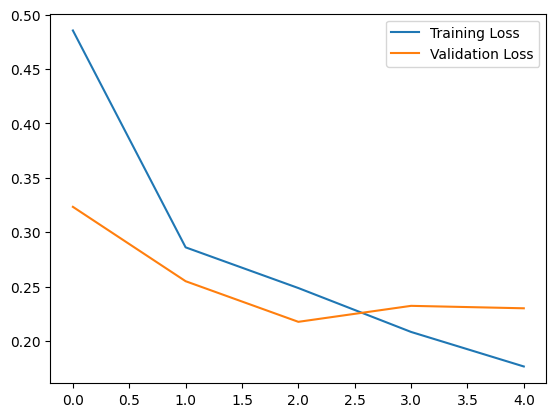

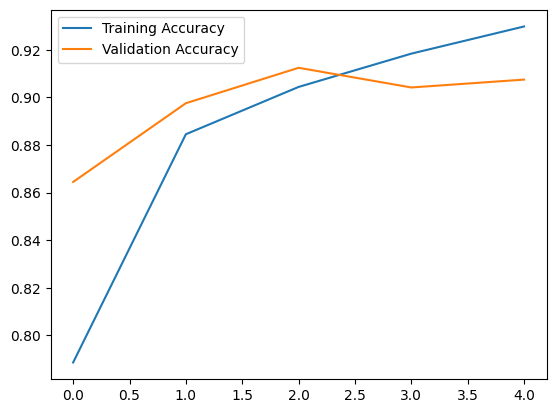

In [34]:
h = history

plt.plot(h.history['loss'], label='Training Loss')
plt.plot(h.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


plt.plot(h.history['acc'], label='Training Accuracy')
plt.plot(h.history['val_acc'], label='Validation Accuracy')
plt.legend()
plt.show()

In [35]:
model.save('model.h5')

/Users/jaybhatt/ML/MlEnv/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**Prediction**

1/1 [==============================] - 0s 74ms/step
[[0.37979376 0.5606558 ]]
Wearing mask


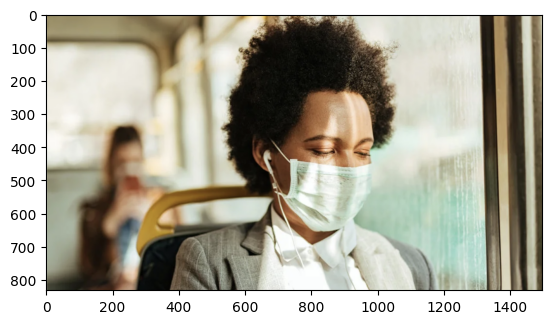

In [40]:
#input_path = input("Input path of the image: ")
input_path = 'image.jpg'

input_image = cv2.imread(input_path)
input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

plt.imshow(input_image)

input_image = cv2.resize(input_image, (128,128))/255.0
input_image_reshaped = np.reshape(input_image, [1,128,128,3])

pred = model.predict(input_image_reshaped)

print(pred)

pred_label = np.argmax(pred)
if pred_label == 1:
    print("Wearing mask")
else:
    print("Not wearing mask")